In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [ ]:
#  Import Louisville Kentucky data without irrelevant columns

In [93]:
Lou = pd.read_csv(os.path.join("C:\\Users\\kam52\\OneDrive\\Desktop\\DA2\\Comparing-Crime-LouisvilleKY-MemphisTN\\Louisville_Metro_KY_-_Crime_Data_2022.csv"),
                 parse_dates=['DATE_REPORTED'], usecols = ['DATE_REPORTED', 'CRIME_TYPE'])
Lou

,DATE_REPORTED,CRIME_TYPE
0,2022-01-01 09:10:00,ASSAULT
1,2022-01-01 00:26:00,VANDALISM
2,2022-01-01 00:56:00,VEHICLE BREAK-IN/THEFT
3,2022-01-01 01:14:00,VANDALISM
4,2022-01-01 01:21:00,BURGLARY
...,...,...
56323,2022-10-17 14:47:00,THEFT/LARCENY
56324,2022-10-17 15:30:00,ASSAULT
56325,2022-10-17 15:31:00,OTHER
56326,2022-10-17 15:14:00,FRAUD


In [ ]:
#  Import Memphis Tenessee data

In [94]:
df = pd.read_csv(os.path.join("C:\\Users\\kam52\\OneDrive\\Desktop\\DA2\\Comparing-Crime-LouisvilleKY-MemphisTN\\Memphis_Police_Department_Aggregate_Crime.csv"))
df

,MONTHYEAR,MONTH,YEAR,CATEGORY,COUNT,Month_YOY_Percent_Change,Count YTD,YTD_Percent_Change,MonthOrder
0,January 2006,January,2006,Major Property Crime,4603,NaN,4603,NaN,1
1,January 2006,January,2006,Major Violent Crime,992,NaN,992,NaN,1
2,February 2006,February,2006,Major Property Crime,3552,NaN,8155,NaN,2
3,February 2006,February,2006,Major Violent Crime,716,NaN,1708,NaN,2
4,March 2006,March,2006,Major Property Crime,4465,NaN,12620,NaN,3
...,...,...,...,...,...,...,...,...,...
181,July 2022,July,2022,Major Violent Crime,851,-10.420000,5783,-0.580000,7
182,August 2022,August,2022,Major Property Crime,4144,35.248042,27735,25.965119,8
183,August 2022,August,2022,Major Violent Crime,837,-4.123711,6620,-1.046338,8
184,September 2022,September,2022,Major Property Crime,4045,34.073583,31780,26.942281,9


In [ ]:
#  Type the data to prepare to select only 2022 information

In [95]:
Lou.dtypes

DATE_REPORTED    datetime64[ns]
CRIME_TYPE               object
dtype: object

In [96]:
df.dtypes

MONTHYEAR                    object
MONTH                        object
YEAR                          int64
CATEGORY                     object
COUNT                         int64
Month_YOY_Percent_Change    float64
Count YTD                     int64
YTD_Percent_Change          float64
MonthOrder                    int64
dtype: object

In [ ]:
#Totaling CrimeType counts

In [31]:
SumLou = Lou.groupby('CRIME_TYPE').count()
print(SumLou)

                          DATE_REPORTED
CRIME_TYPE                             
ARSON                               109
ASSAULT                           12934
BURGLARY                           3482
DISTURBING THE PEACE                261
DRUGS/ALCOHOL VIOLATIONS           4027
DUI                                   1
FRAUD                              2627
HOMICIDE                            124
MOTOR VEHICLE THEFT                3479
OTHER                              8877
ROBBERY                             871
SEX CRIMES                          424
THEFT/LARCENY                      9200
VANDALISM                          4810
VEHICLE BREAK-IN/THEFT             4322
WEAPONS                             780


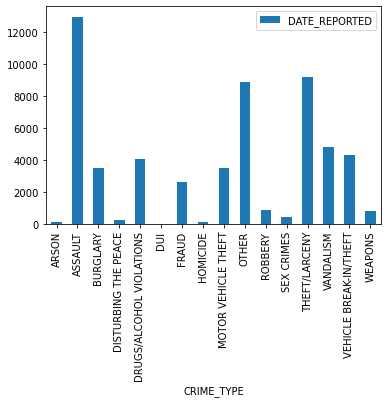

In [32]:
SumLou = Lou.groupby('CRIME_TYPE').count().plot(kind="bar")

In [ ]:
#Seperating date and time from Lou DATE_REPORTED

In [97]:
Lou['DATE'] = [d.date() for d in Lou['DATE_REPORTED']]
Lou['TIME'] = [d.time() for d in Lou['DATE_REPORTED']]
Lou

,DATE_REPORTED,CRIME_TYPE,DATE,TIME
0,2022-01-01 09:10:00,ASSAULT,2022-01-01,09:10:00
1,2022-01-01 00:26:00,VANDALISM,2022-01-01,00:26:00
2,2022-01-01 00:56:00,VEHICLE BREAK-IN/THEFT,2022-01-01,00:56:00
3,2022-01-01 01:14:00,VANDALISM,2022-01-01,01:14:00
4,2022-01-01 01:21:00,BURGLARY,2022-01-01,01:21:00
...,...,...,...,...
56323,2022-10-17 14:47:00,THEFT/LARCENY,2022-10-17,14:47:00
56324,2022-10-17 15:30:00,ASSAULT,2022-10-17,15:30:00
56325,2022-10-17 15:31:00,OTHER,2022-10-17,15:31:00
56326,2022-10-17 15:14:00,FRAUD,2022-10-17,15:14:00


In [ ]:
# Removing columns no longer needed

In [89]:
#Lou.drop('DATE_REPORTED')
#Lou.drop(Lou.iloc[:, 3:], axis = 1)
#Lou.drop(['DATE_REPORTED'],axis=1)

KeyError: "['DATE_REPORTED'] not found in axis"

In [ ]:
#  Selecting only the 2022 data for comparison

In [98]:
Mem =df.loc[df['YEAR']>2021]
Mem

,MONTHYEAR,MONTH,YEAR,CATEGORY,COUNT,Month_YOY_Percent_Change,Count YTD,YTD_Percent_Change,MonthOrder
168,January 2022,January,2022,Major Property Crime,3205,0.560000,3205,0.560000,1
169,January 2022,January,2022,Major Violent Crime,781,-3.700000,781,-3.700000,1
170,February 2022,February,2022,Major Property Crime,2680,26.000000,5885,10.750000,2
171,February 2022,February,2022,Major Violent Crime,641,8.640000,1422,1.500000,2
172,March 2022,March,2022,Major Property Crime,2771,8.030000,8656,9.860000,3
173,March 2022,March,2022,Major Violent Crime,767,0.390000,2189,1.110000,3
174,April 2022,April,2022,Major Property Crime,3064,29.560000,11720,14.410000,4
175,April 2022,April,2022,Major Violent Crime,869,6.500000,3058,2.580000,4
176,May 2022,May,2022,Major Property Crime,3736,29.090000,15456,17.640000,5
177,May 2022,May,2022,Major Violent Crime,983,0.310000,4041,2.020000,5


In [ ]:
#  Memphis data is Aggregate data where Louisville is per occurance, 
#  therefore I need to summarize the Louisville data to compare to Memphis.

In [30]:
TypeLou =  pd.unique(Lou['CRIME_TYPE'])
TypeLou

array(['ASSAULT', 'VANDALISM', 'VEHICLE BREAK-IN/THEFT', 'BURGLARY',
       'OTHER', 'THEFT/LARCENY', 'ROBBERY', 'DRUGS/ALCOHOL VIOLATIONS',
       'MOTOR VEHICLE THEFT', 'DISTURBING THE PEACE', 'FRAUD',
       'SEX CRIMES', 'HOMICIDE', 'WEAPONS', 'ARSON', 'DUI'], dtype=object)

In [33]:
for index in Lou.index:
    if Lou.loc[index,'CRIME_TYPE']=='ASSAULT':
        Lou.loc[index,'CRIME_TYPE'] = 'Major Violent Crime'
    elif Lou.loc[index,'CRIME_TYPE']=='ROBBERY':
        Lou.loc[index,'CRIME_TYPE'] = 'Major Violent Crime'
    elif Lou.loc[index,'CRIME_TYPE']=='SEX CRIMES':
        Lou.loc[index,'CRIME_TYPE'] = 'Major Violent Crime'
    elif Lou.loc[index,'CRIME_TYPE']=='HOMICIDE':
        Lou.loc[index,'CRIME_TYPE'] = 'Major Violent Crime'
    elif Lou.loc[index,'CRIME_TYPE']=='VEHICLE BREAK-IN/THEFT':
        Lou.loc[index,'CRIME_TYPE'] = 'Major Property Crime'
    elif Lou.loc[index,'CRIME_TYPE']=='BURGLARY':
        Lou.loc[index,'CRIME_TYPE'] = 'Major Property Crime'
    elif Lou.loc[index,'CRIME_TYPE']=='ARSON':
        Lou.loc[index,'CRIME_TYPE'] = 'Major Property Crime'
    elif Lou.loc[index,'CRIME_TYPE']=='MOTOR VEHICLE THEFT':
        Lou.loc[index,'CRIME_TYPE'] = 'Major Property Crime'
    elif Lou.loc[index,'CRIME_TYPE']=='THEFT/LARCENY':
        Lou.loc[index,'CRIME_TYPE'] = 'Major Property Crime'
    elif Lou.loc[index,'CRIME_TYPE']=='VANDALISM':
        Lou.loc[index,'CRIME_TYPE'] = 'Other'    
    elif Lou.loc[index,'CRIME_TYPE']=='DRUGS/ALCOHOL VIOLATIONS':
        Lou.loc[index,'CRIME_TYPE'] = 'Other'
    elif Lou.loc[index,'CRIME_TYPE']=='DISTURBING THE PEACE':
        Lou.loc[index,'CRIME_TYPE'] = 'Other'
    elif Lou.loc[index,'CRIME_TYPE']=='FRAUD':
        Lou.loc[index,'CRIME_TYPE'] = 'Other' 
    elif Lou.loc[index,'CRIME_TYPE']=='WEAPONS':
        Lou.loc[index,'CRIME_TYPE'] = 'Other'    
    elif Lou.loc[index,'CRIME_TYPE']=='DUI':
        Lou.loc[index,'CRIME_TYPE'] = 'Other'   

In [34]:
print(Lou)

             DATE_REPORTED            CRIME_TYPE
0      2022/01/01 09:10:00   Major Violent Crime
1      2022/01/01 00:26:00                 Other
2      2022/01/01 00:56:00  Major Property Crime
3      2022/01/01 01:14:00                 Other
4      2022/01/01 01:21:00  Major Property Crime
...                    ...                   ...
56323  2022/10/17 14:47:00  Major Property Crime
56324  2022/10/17 15:30:00   Major Violent Crime
56325  2022/10/17 15:31:00                 OTHER
56326  2022/10/17 15:14:00                 Other
56327  2022/10/17 16:00:00   Major Violent Crime

[56328 rows x 2 columns]


In [91]:
Lou = Lou.rename(columns={'CRIME_TYPE': 'CATEGORY'})
Lou

""
0
1
2
3
4
...
56323
56324
56325
56326
